## Imports

In [115]:
import numpy as np
import pandas as pd

# for data-visualization
import seaborn as sns
import matplotlib.pyplot as plt

# import pandas_profiling as pp
# from sklearn import svm
# from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN ###RUn for best results


#import sklearn important functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score #needed for classification problems
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM

#import python based open-source system for mathematical , science and engineering functions
import scipy 


import time


sns.set(color_codes=True)

# Starting with the standard imports
%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt                              # for plotting
import seaborn as sns                                        # nicer looking plots
sns.set()
plt.rcParams["figure.figsize"] = "25,10"
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["axes.labelsize"] = 16
import warnings

## Loading data

In [31]:
data = pd.read_csv('https://supportvectorsdatasets.s3-us-west-2.amazonaws.com/warmup/smiley.csv')
data.columns = ["x1", "x2", "t"]

In [32]:
data.head()

,x1,x2,t
0,29.25,55.9,1
1,30.15,55.3,1
2,28.65,54.4,1
3,30.75,53.5,1
4,31.75,54.7,1


In [33]:
data.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
x1,1394.0,53.554735,19.416436,1.65,36.45,53.05,71.65,95.25
x2,1394.0,45.273673,22.107190,3.20,27.25,43.20,69.40,77.80
t,1394.0,4.650646,1.750985,0.00,4.00,5.00,6.00,7.00


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 3 columns):
x1    1394 non-null float64
x2    1394 non-null float64
t     1394 non-null int64
dtypes: float64(2), int64(1)
memory usage: 32.8 KB


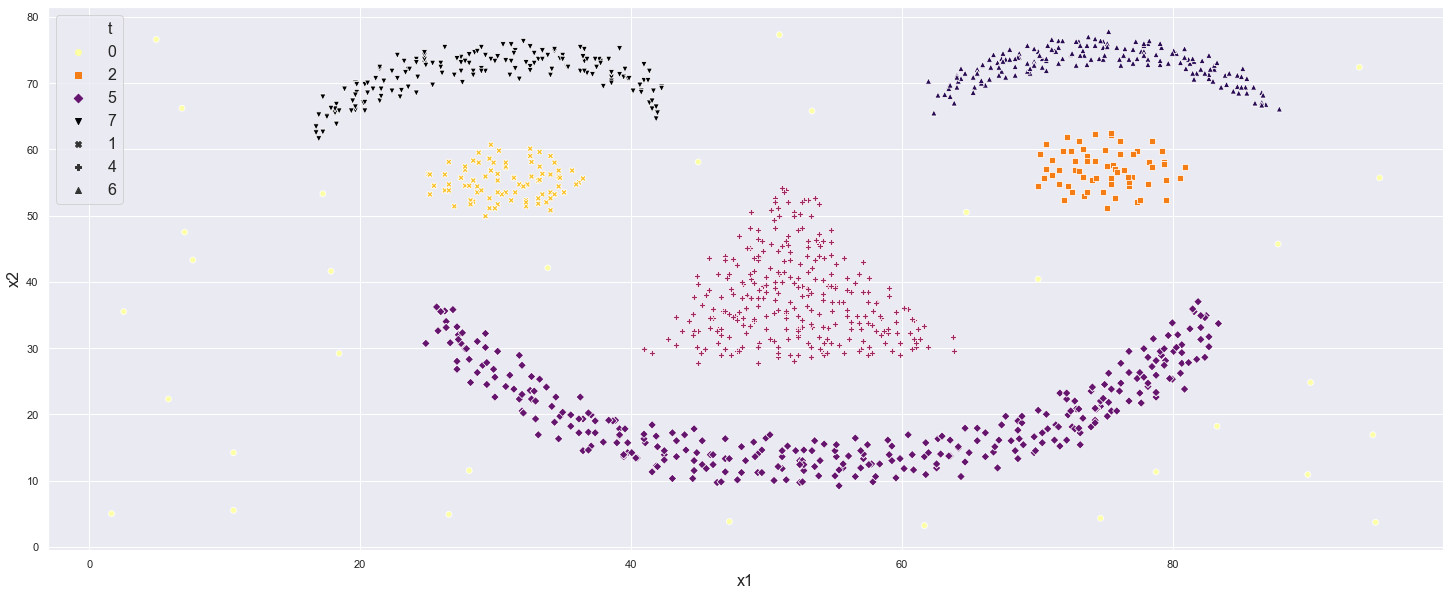

In [35]:
cmap = sns.cubehelix_palette(light= 0.98,dark =.987, as_cmap=True)
sns.scatterplot(palette="inferno_r", x=data["x1"] , y=data["x2"], hue=data["t"], style=data["t"]);

## Nullity Analysis

In [36]:
data.isna().sum()

x1    0
x2    0
t     0
dtype: int64

## Exploratory Data Analysis

In [37]:
X = data.drop("t", axis=1)
y = data["t"]

In [39]:
X.head()

,x1,x2
0,29.25,55.9
1,30.15,55.3
2,28.65,54.4
3,30.75,53.5
4,31.75,54.7


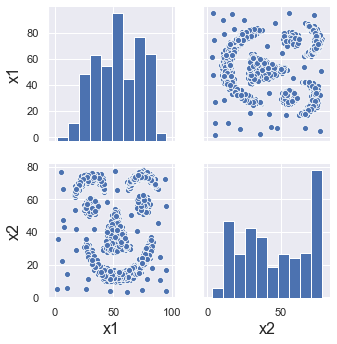

In [40]:
sns.pairplot(X);

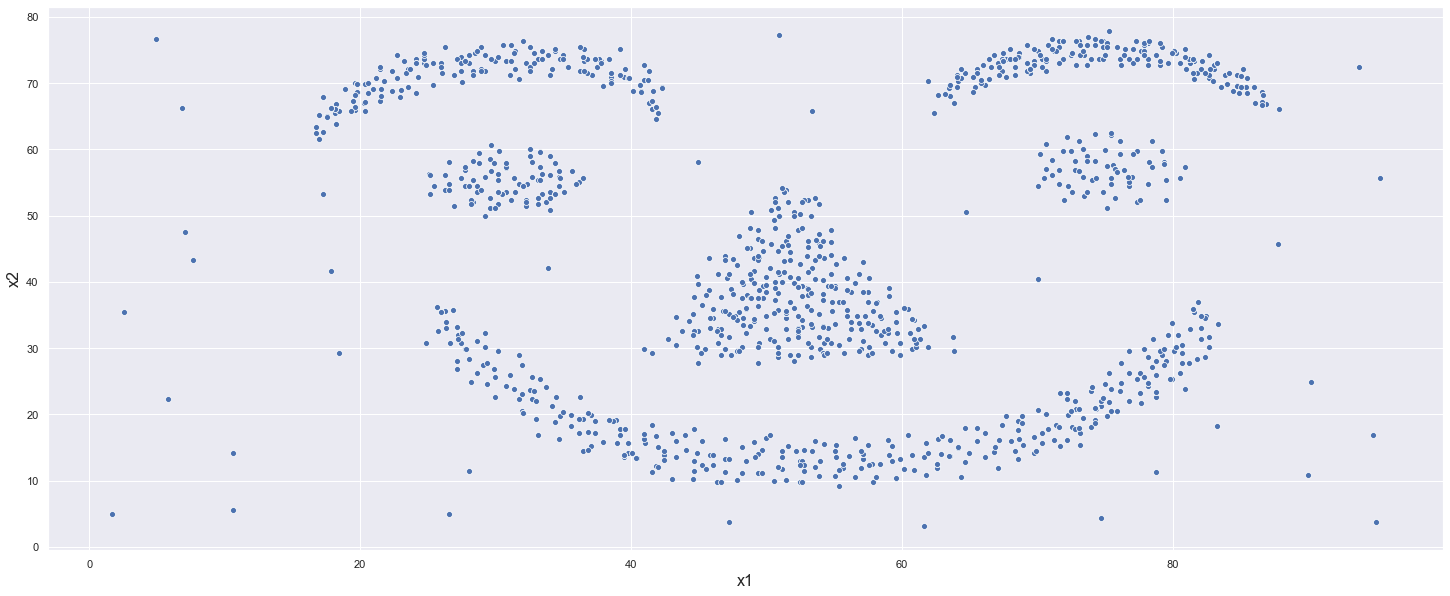

In [41]:
sns.scatterplot(x=data["x1"] , y= data["x2"]);

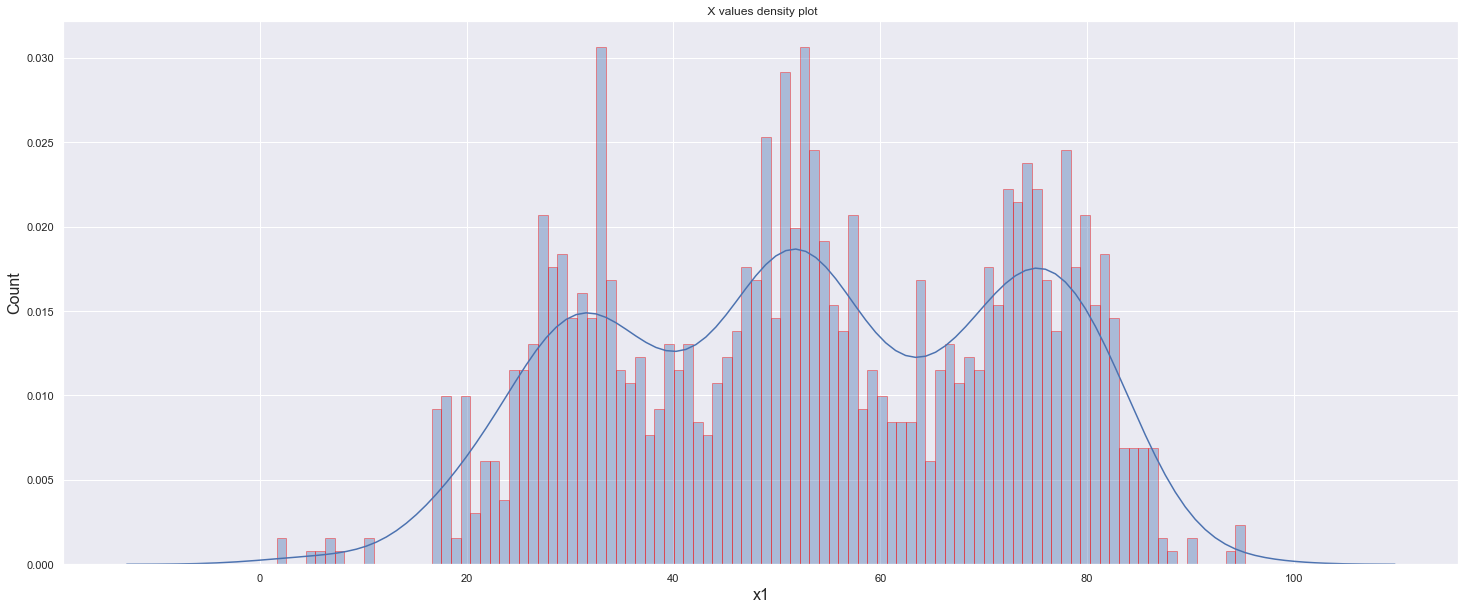

In [42]:
sns.distplot(data['x1'],hist=True, kde=True, bins=100,hist_kws={"edgecolor":"red"});
plt.title(" X values density plot");
plt.xlabel("x1");
plt.ylabel("Count");

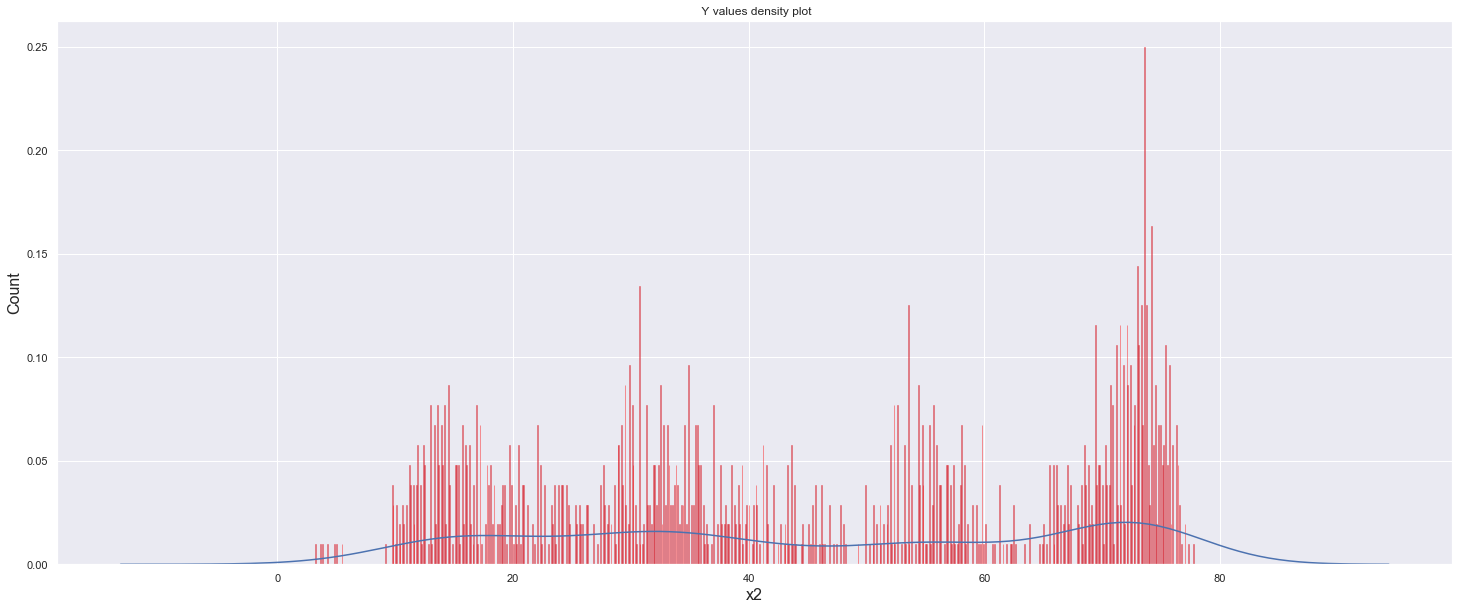

In [43]:
sns.distplot(data['x2'],hist=True, kde=True, bins=1000,hist_kws={"edgecolor":"red"});
plt.title(" Y values density plot");
plt.xlabel("x2");
plt.ylabel("Count");

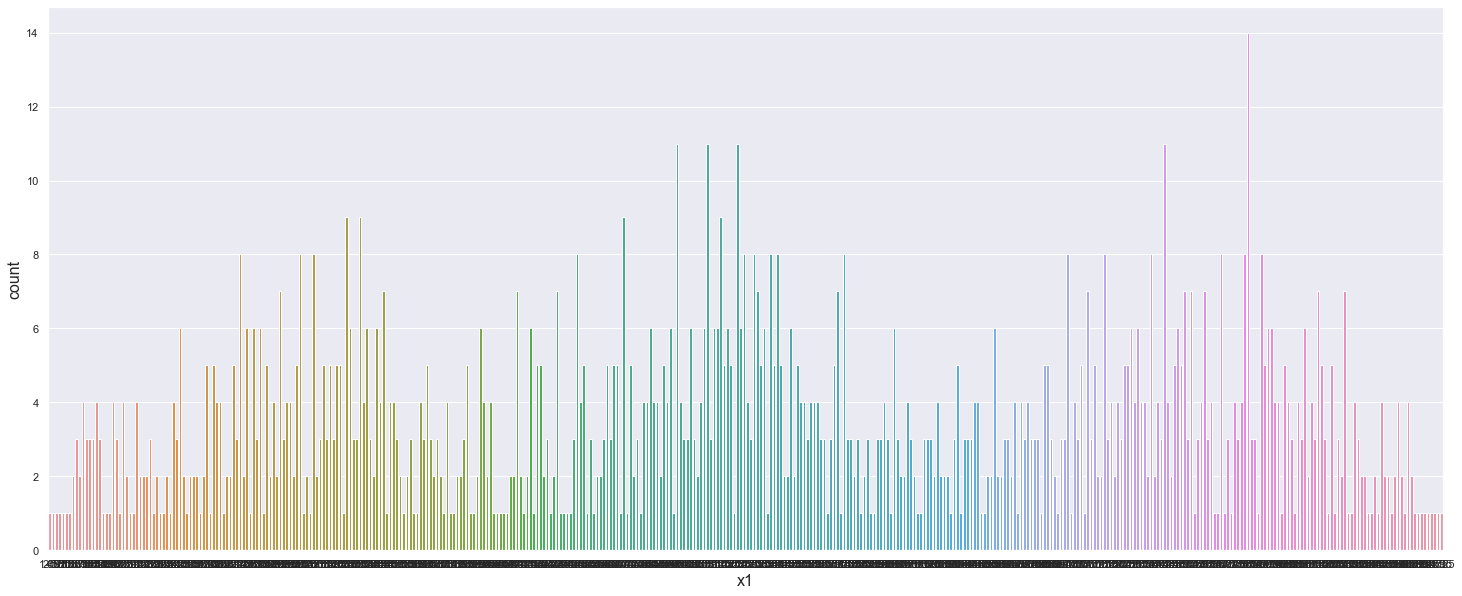

In [44]:
sns.countplot(data["x1"]);

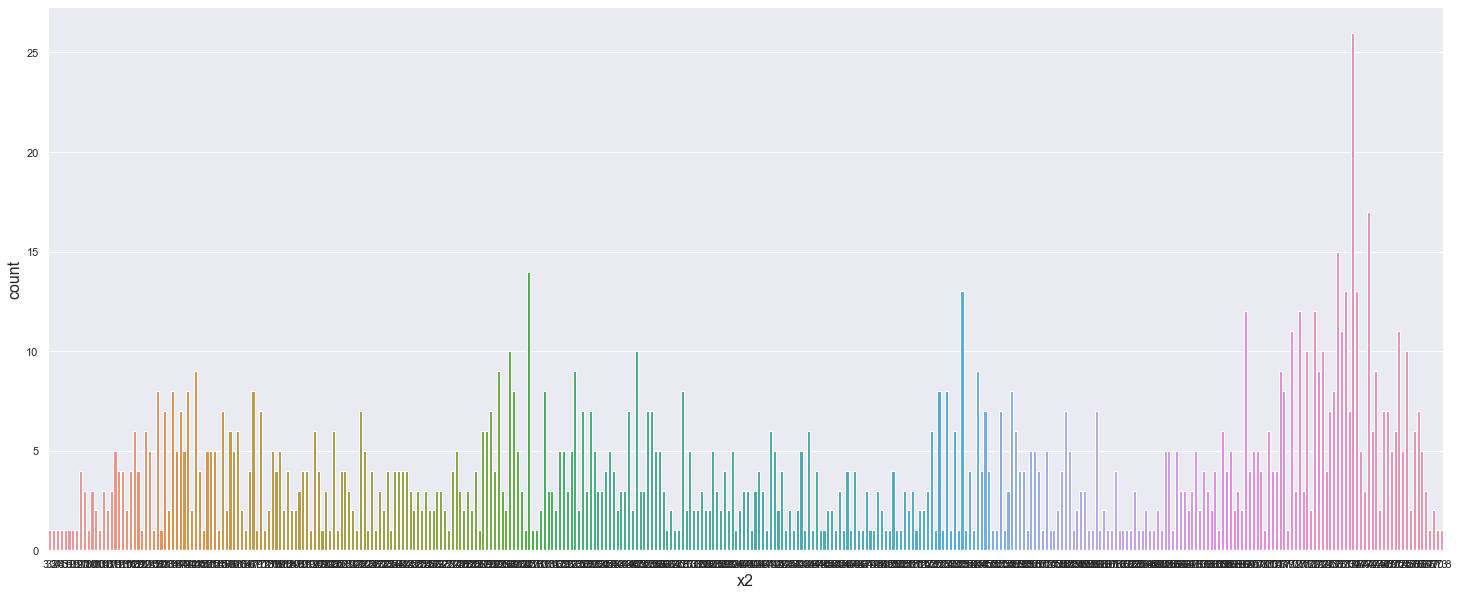

In [45]:
sns.countplot(data["x2"]);

## Local Outlier Factor

Now let's try out the local neighbors on the smiley dataset 

In [46]:
lof = LocalOutlierFactor(n_neighbors=50,
                         algorithm='brute', 
                         metric='mahalanobis', 
                         metric_params ={'V':10});

outliers = lof.fit_predict(X);

/Users/stiwari/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


In [47]:
(outliers == -1).sum()

140

Local Outlier Factor is predicting 140 outliers

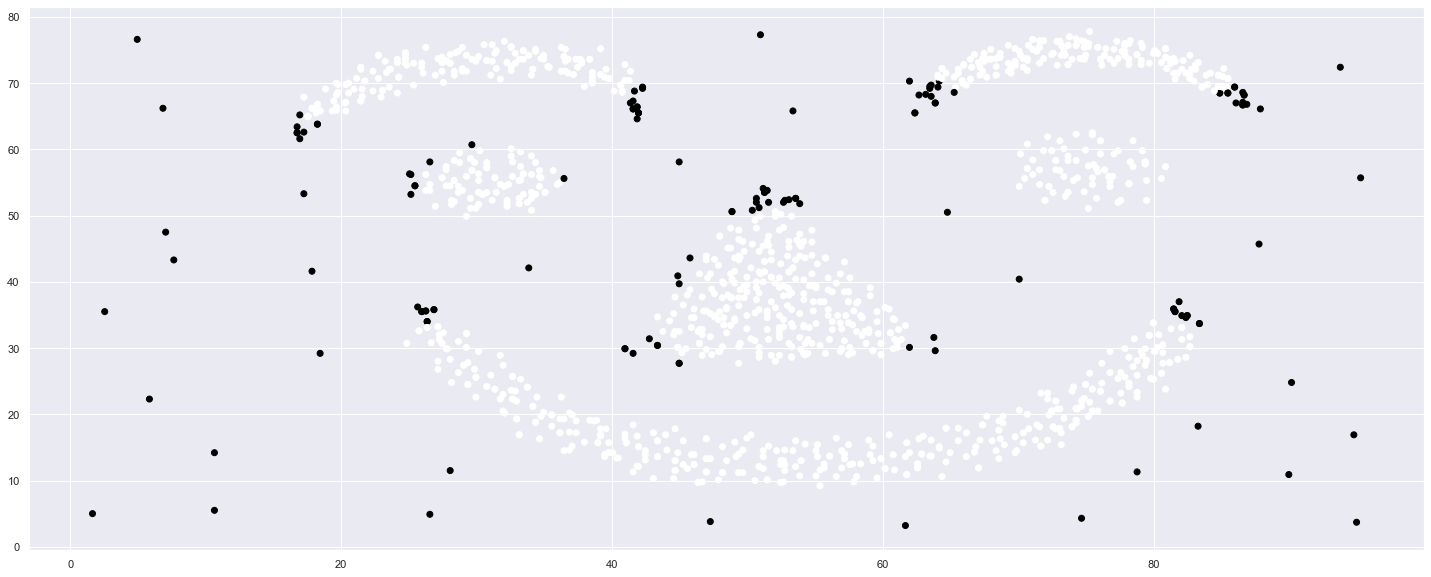

In [48]:
plt.scatter(x=data["x1"], y=data["x2"], color=((outliers + 1)*0.5).astype("str"));

We can see that local outlier factor is identifying the corners of the clusters as outliers. This is because it is sensitive to sharp corners in clusters, and performs better on more nebular structures

In [49]:
outliers = outliers.astype("float")
outliers

array([ 1.,  1.,  1., ..., -1., -1., -1.])

## MinMax vs. Robust vs. Standard

In [90]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [95]:
mm = MinMaxScaler()
r = RobustScaler()
s = StandardScaler()

mm_scaled = mm.fit_transform(X)
r_scaled = r.fit_transform(X)
s_scaled = s.fit_transform(X)

mm_scaled = pd.DataFrame(mm_scaled, columns = ["x1", "x2"])
outlier_detection = DBSCAN(
  eps = 0.05,
  metric="euclidean",
  min_samples = 15,
  n_jobs = -1)
clusters = outlier_detection.fit_predict(mm_scaled)
mm_scaled["preds"] = clusters

r_scaled = pd.DataFrame(r_scaled, columns = ["x1", "x2"])
outlier_detection = DBSCAN(
  eps = 0.1,
  metric="euclidean",
  min_samples = 15,
  n_jobs = -1)
clusters = outlier_detection.fit_predict(r_scaled)
r_scaled["preds"] = clusters

s_scaled = pd.DataFrame(s_scaled, columns = ["x1", "x2"])
outlier_detection = DBSCAN(
  eps = 0.2,
  metric="euclidean",
  min_samples = 15,
  n_jobs = -1)
clusters = outlier_detection.fit_predict(s_scaled)
s_scaled["preds"] = clusters

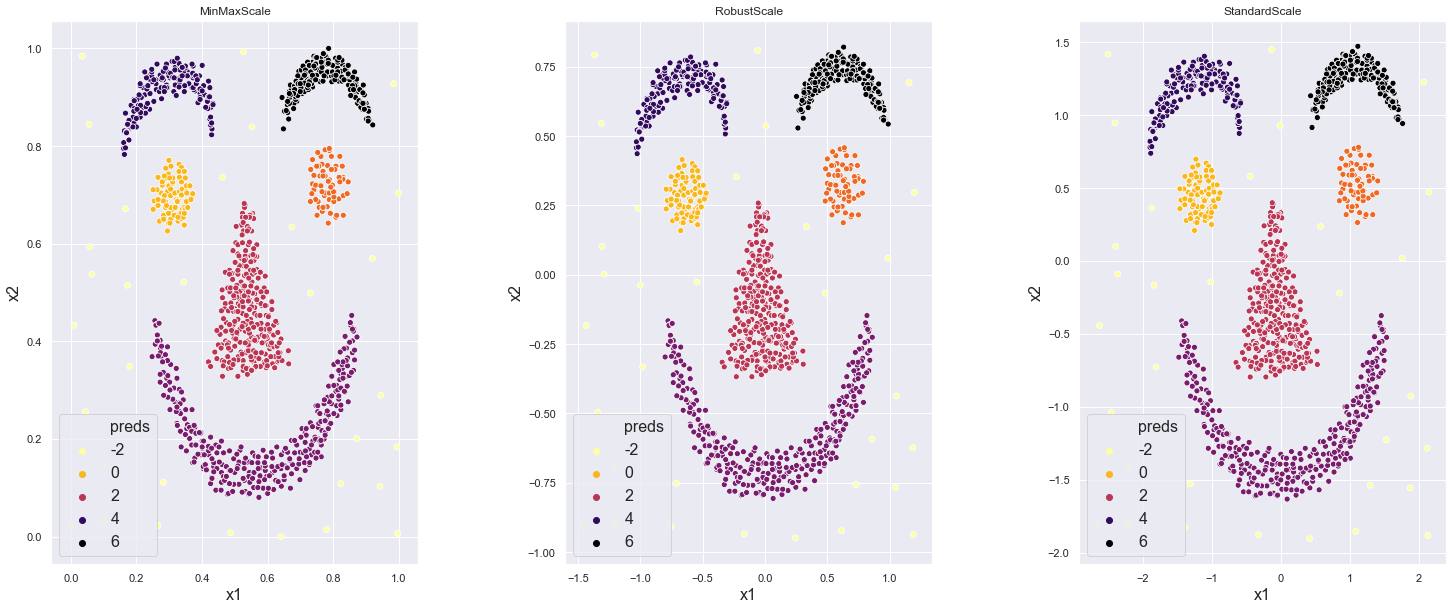

In [96]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 3, 1)
sns.scatterplot(mm_scaled["x1"], mm_scaled["x2"], cmap="viridis", hue=mm_scaled["preds"], palette="inferno_r");
plt.title("MinMaxScale");

ax = fig.add_subplot(1, 3, 2)
sns.scatterplot(r_scaled["x1"], r_scaled["x2"], cmap="viridis", hue=r_scaled["preds"], palette="inferno_r");
plt.title("RobustScale");

ax = fig.add_subplot(1, 3, 3)
sns.scatterplot(s_scaled["x1"], s_scaled["x2"], cmap="viridis", hue=s_scaled["preds"], palette="inferno_r");
plt.title("StandardScale");

## Min Max Scaling

In [97]:
mm = MinMaxScaler()

mm_scaled = mm.fit_transform(X)
mm_scaled = pd.DataFrame(mm_scaled, columns=["x1", "x2"])

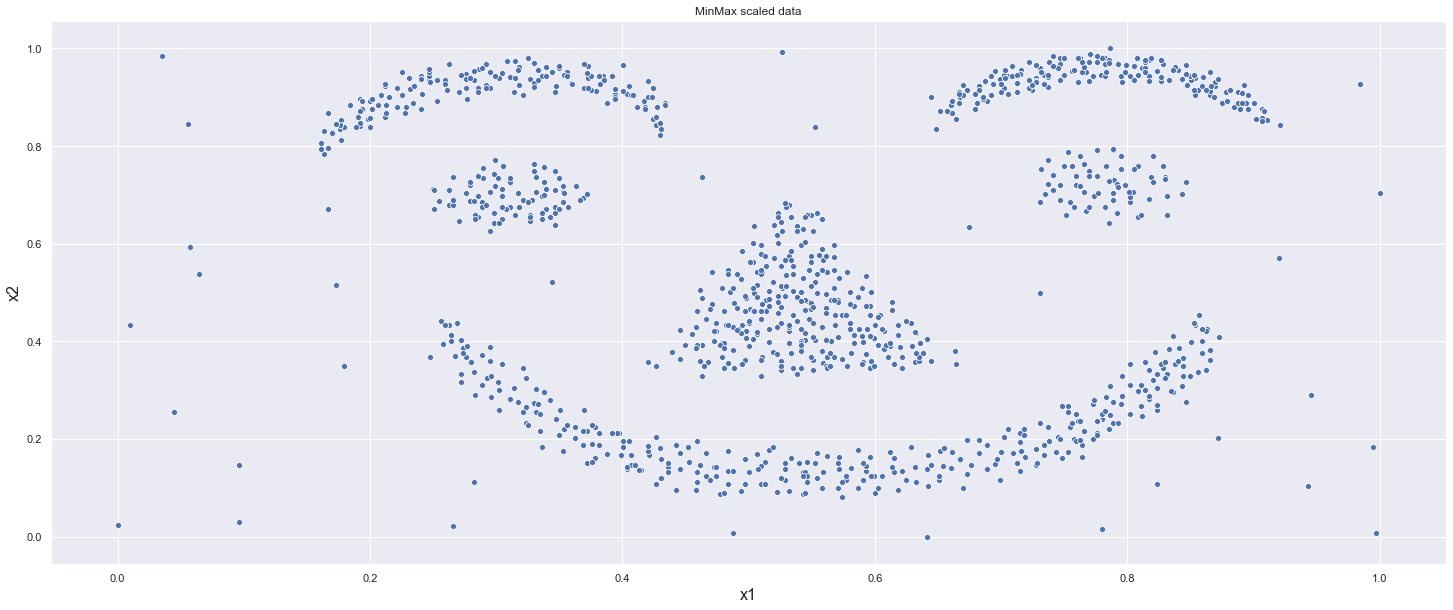

In [98]:
sns.scatterplot(data=mm_scaled, x="x1", y="x2");
plt.title("MinMax scaled data");

We can see that our data is squeezed between $0$ and $1$. Using a Min-Max scaler on the data for anomaly detection, will improve the performance of models.

## Anomaly Detection

In [99]:
from sklearn.cluster import DBSCAN

In [100]:
dbscan = DBSCAN(eps = 0.05, 
                metric="euclidean", 
                min_samples=15, 
                n_jobs=-1)

clusters = dbscan.fit_predict(mm_scaled)

# unique values of the cluster groups predicted by DB scan (-1 for outliers)
np.unique(clusters)

array([-1,  0,  1,  2,  3,  4,  5])

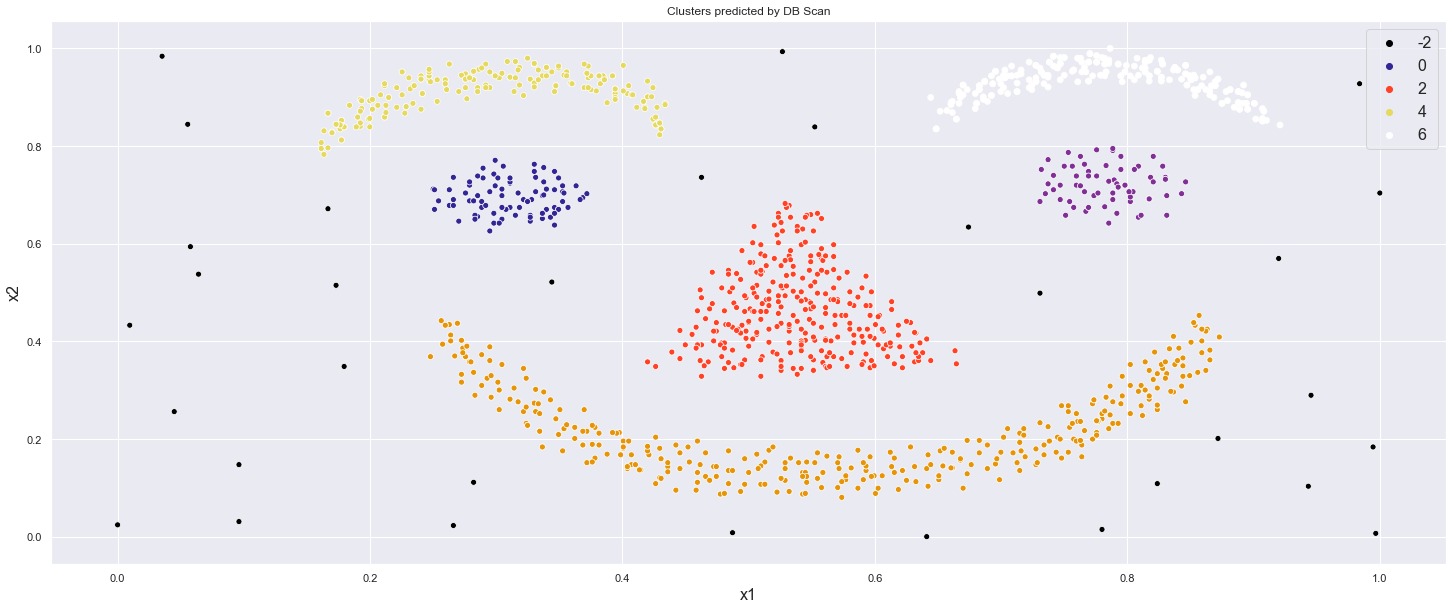

In [101]:
sns.scatterplot(data=mm_scaled, x="x1", y="x2", hue=clusters, palette="CMRmap");
plt.title("Clusters predicted by DB Scan");

In [107]:
mm_scaled["clusters_pred"] = clusters

In [108]:
mm_scaled.groupby("clusters_pred").count()

,x1,x2
clusters_pred,,
-1,32,32
0,98,98
1,80,80
2,328,328
3,419,419
4,196,196
5,241,241


In [109]:
no_pimple = mm_scaled[mm_scaled["clusters_pred"] != -1]

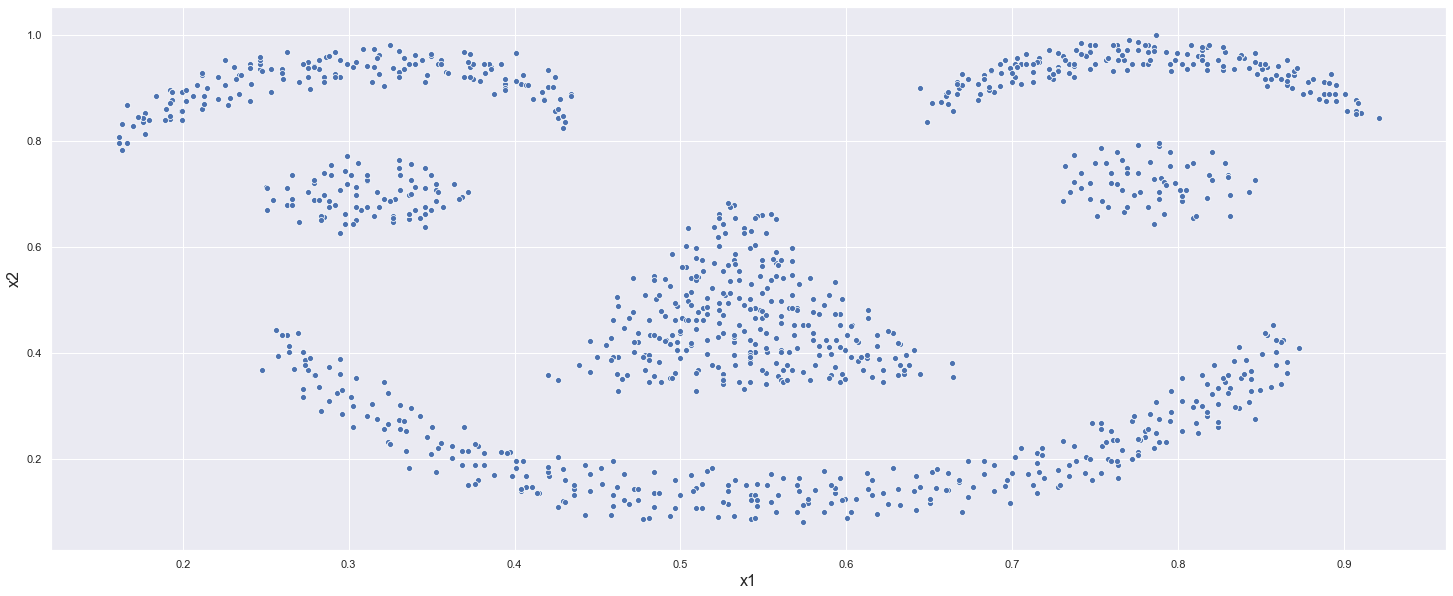

In [110]:
sns.scatterplot(no_pimple["x1"], no_pimple["x2"],cmap="viridis", palette="inferno_r");

### One-Class SVM

In [111]:
no_pimple["clusters_pred"] = 1

/Users/stiwari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [113]:
X = no_pimple.drop("clusters_pred", axis=1)
y = no_pimple["clusters_pred"]

In [116]:
one_class =  OneClassSVM(kernel='rbf', 
                         degree=9, 
                         gamma='auto', 
                         coef0=0.0,
                         tol=0.001, 
                         nu=0.5, 
                         shrinking=True, 
                         cache_size=200, 
                         verbose=False, 
                         max_iter=-1,
                         random_state=None)

In [117]:
clf = one_class.fit(X);

In [118]:
X_test = mm_scaled.drop("clusters_pred", axis=1)
y_test = mm_scaled["clusters_pred"]

In [119]:
predictions = clf.predict(X_test)
predictions

array([ 1,  1,  1, ..., -1, -1, -1])

In [120]:
(predictions == y_test).mean()

0.07604017216642754

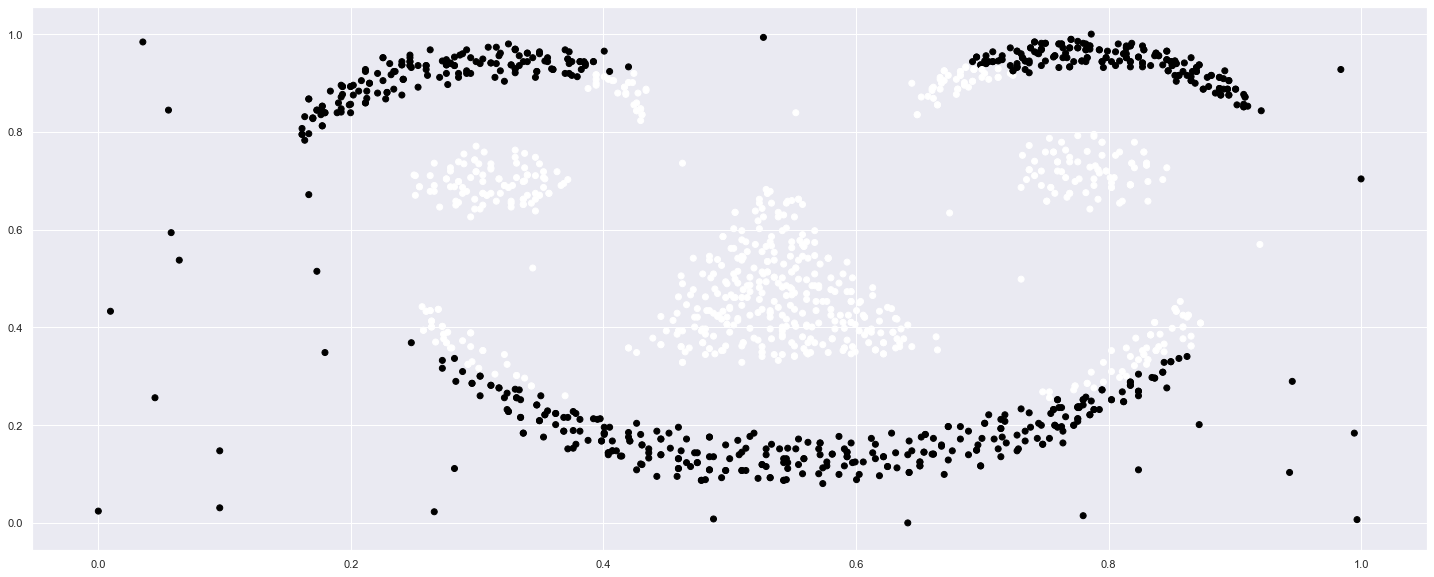

In [128]:
plt.scatter(mm_scaled["x1"], mm_scaled["x2"], c=((predictions+1)*.5 ).astype(str));